In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [407]:
!kaggle competitions download -c uw-madison-gi-tract-image-segmentation

User cancelled operation
^C


In [ ]:
!mv /content/uw-madison-gi-tract-image-segmentation.zip  /content/drive/MyDrive/kaggle/

In [ ]:
!unzip /content/drive/MyDrive/kaggle/uw-madison-gi-tract-image-segmentation.zip -d /content/drive/MyDrive/kaggle/

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kaggle/train.csv')

In [2]:
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [3]:
len(df) - df.segmentation.isna().sum()

np.int64(33913)

In [4]:
df.head()

,id,class,segmentation
0,case123_day20_slice_0001,large_bowel,NaN
1,case123_day20_slice_0001,small_bowel,NaN
2,case123_day20_slice_0001,stomach,NaN
3,case123_day20_slice_0002,large_bowel,NaN
4,case123_day20_slice_0002,small_bowel,NaN


In [5]:
df["Case"] = df["id"].str.split("_", expand = True)[0]
df["Day"] = df["id"].str.split("_", expand = True)[1]
df["Slice_id"] = df["id"].str.split("_", expand = True)[3]

In [6]:
df.head()

,id,class,segmentation,Case,Day,Slice_id
0,case123_day20_slice_0001,large_bowel,NaN,case123,day20,0001
1,case123_day20_slice_0001,small_bowel,NaN,case123,day20,0001
2,case123_day20_slice_0001,stomach,NaN,case123,day20,0001
3,case123_day20_slice_0002,large_bowel,NaN,case123,day20,0002
4,case123_day20_slice_0002,small_bowel,NaN,case123,day20,0002


In [7]:
df.drop(["id"], axis=1, inplace = True)

In [8]:
df.head()

,class,segmentation,Case,Day,Slice_id
0,large_bowel,NaN,case123,day20,0001
1,small_bowel,NaN,case123,day20,0001
2,stomach,NaN,case123,day20,0001
3,large_bowel,NaN,case123,day20,0002
4,small_bowel,NaN,case123,day20,0002


In [9]:
path = "/content/drive/MyDrive/kaggle/train/"+df["Case"]+"/"+df["Case"]+"_"+df["Day"]+"/scans/"

In [11]:
import glob
from tqdm import tqdm

present = []
height = []
width = []
pixel_hieght = []
pixel_width = []

for i in tqdm(range(len(df))):
  row = df.iloc[i]
  path = "/content/drive/MyDrive/kaggle/train/"+row["Case"]+"/"+row["Case"]+"_"+row["Day"]+"/scans/slice_"+row["Slice_id"]
  files = glob.glob(path+"*")
  if len(files) > 0:
    present.append(1)
    file_ = files[0]
    height.append(file_.split("_")[3])
    width.append(file_.split("_")[4])
    pixel_hieght.append(file_.split("_")[5])
    pixel_width.append(file_.split("_")[6])
  else:
    present.append(0)
    height.append(0)
    width.append(0)
    pixel_hieght.append(0)
    pixel_width.append(0)


100%|██████████| 115488/115488 [01:34<00:00, 1220.76it/s]


In [12]:
df["present"] = present
df["height"] = height
df["width"] = width
df["pixel_hieght"] = pixel_hieght
df["pixel_width"] = pixel_width

In [13]:
df.head()

,class,segmentation,Case,Day,Slice_id,present,height,width,pixel_hieght,pixel_width
0,large_bowel,NaN,case123,day20,0001,1,266,266,1.50,1.50.png
1,small_bowel,NaN,case123,day20,0001,1,266,266,1.50,1.50.png
2,stomach,NaN,case123,day20,0001,1,266,266,1.50,1.50.png
3,large_bowel,NaN,case123,day20,0002,1,266,266,1.50,1.50.png
4,small_bowel,NaN,case123,day20,0002,1,266,266,1.50,1.50.png


In [14]:
df["filepath"] = "/content/drive/MyDrive/kaggle/train/"+df["Case"]+"/"+df["Case"]+"_"+df["Day"]+"/scans/slice_"+df["Slice_id"]+"_"+df["height"].astype(str)+"_"+df["width"].astype(str)+"_"+df["pixel_hieght"].astype(str)+"_"+df["pixel_width"].str.replace(".png", "", regex=False)+".png"

In [15]:
df.head()

,class,segmentation,Case,Day,Slice_id,present,height,width,pixel_hieght,pixel_width,filepath
0,large_bowel,NaN,case123,day20,0001,1,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
1,small_bowel,NaN,case123,day20,0001,1,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
2,stomach,NaN,case123,day20,0001,1,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
3,large_bowel,NaN,case123,day20,0002,1,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
4,small_bowel,NaN,case123,day20,0002,1,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...


In [16]:
test_file_path =  df.iloc[1]["filepath"]

In [17]:
test_file_path

'/content/drive/MyDrive/kaggle/train/case123/case123_day20/scans/slice_0001_266_266_1.50_1.50.png'

In [18]:
import cv2

In [19]:
img = cv2.imread(test_file_path)

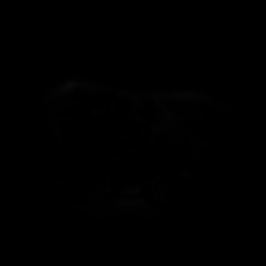

In [20]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [21]:
img.shape

(266, 266, 3)

In [22]:
df = df[df["present"]==1]

In [23]:
df.drop(["present"], axis=1, inplace = True)

/tmp/ipython-input-23-2135786417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["present"], axis=1, inplace = True)


In [24]:
df["class"].value_counts()

,count
class,
large_bowel,21872
small_bowel,21872
stomach,21872


In [25]:
### Balanced

In [26]:
df.head()

,class,segmentation,Case,Day,Slice_id,height,width,pixel_hieght,pixel_width,filepath
0,large_bowel,NaN,case123,day20,0001,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
1,small_bowel,NaN,case123,day20,0001,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
2,stomach,NaN,case123,day20,0001,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
3,large_bowel,NaN,case123,day20,0002,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...
4,small_bowel,NaN,case123,day20,0002,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...


In [27]:
df["Stomach"] = df["segmentation"].where(df["class"] == "stomach")
df["Large_bowel"] = df["segmentation"].where(df["class"] == "large_bowel")
df["Small_bowel"] = df["segmentation"].where(df["class"] == "small_bowel")

In [28]:
### merging these three columns for same case, day, slices
df_merged = df.groupby(["Case", "Day", "Slice_id"]).agg({
    "Stomach": "first",
    "Large_bowel": "first",
    "Small_bowel": "first"
}).reset_index()


In [29]:
df.head()

,class,segmentation,Case,Day,Slice_id,height,width,pixel_hieght,pixel_width,filepath,Stomach,Large_bowel,Small_bowel
0,large_bowel,NaN,case123,day20,0001,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...,NaN,NaN,NaN
1,small_bowel,NaN,case123,day20,0001,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...,NaN,NaN,NaN
2,stomach,NaN,case123,day20,0001,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...,NaN,NaN,NaN
3,large_bowel,NaN,case123,day20,0002,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...,NaN,NaN,NaN
4,small_bowel,NaN,case123,day20,0002,266,266,1.50,1.50.png,/content/drive/MyDrive/kaggle/train/case123/ca...,NaN,NaN,NaN


In [30]:
df.drop(["class","segmentation","pixel_hieght","pixel_width","Stomach","Large_bowel","Small_bowel"], axis=1, inplace=True)

In [31]:
df_merged.head()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel
0,case101,day20,0001,None,None,None
1,case101,day20,0002,None,None,None
2,case101,day20,0003,None,None,None
3,case101,day20,0004,None,None,None
4,case101,day20,0005,None,None,None


In [32]:
df = pd.merge(df_merged, df, on=["Case","Day","Slice_id"], how="inner")

In [33]:
df.head()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel,height,width,filepath
0,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
1,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
2,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
3,case101,day20,0002,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
4,case101,day20,0002,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...


In [34]:
len(df)

65616

In [35]:
df_merged[df_merged['Large_bowel'].notna()]

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel
73,case101,day20,0074,26517 10 26781 16 27046 19 27311 22 27577 23 2...,31080 6 31345 8 31610 10 31876 10 32142 10 324...,None
74,case101,day20,0075,25984 12 26249 15 26514 18 26779 20 27044 23 2...,30813 7 31078 10 31343 11 31609 12 31875 12 32...,None
75,case101,day20,0076,25187 11 25451 15 25716 17 25981 19 26246 21 2...,30281 5 30545 10 30810 12 31076 13 31341 14 31...,None
76,case101,day20,0077,23857 10 24121 14 24386 16 24651 18 24916 20 2...,30014 7 30278 11 30543 13 30809 14 31074 15 31...,None
77,case101,day20,0078,22262 6 22526 10 22791 13 23056 16 23321 18 23...,29483 3 29747 8 30011 12 30276 14 30542 15 308...,None
...,...,...,...,...,...,...
21845,case29,day14,0118,None,26911 3 27176 5 27441 6 27706 8 27972 8 28238 ...,16861 3 17122 15 17387 19 17652 23 17917 29 18...
21846,case29,day14,0119,None,27177 1 27441 4 27706 6 27972 6 28237 8 28503 ...,17126 7 17389 15 17654 19 17919 22 18183 26 18...
21847,case29,day14,0120,None,27707 3 27972 5 28237 6 28502 8 28768 8 29034 ...,17390 10 17655 16 17920 19 18184 23 18441 40 1...
21848,case29,day14,0121,None,27972 3 28237 5 28502 7 28768 7 29033 8 29219 ...,17656 11 17920 17 18185 21 18448 34 18706 48 1...


In [36]:
df.head()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel,height,width,filepath
0,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
1,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
2,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
3,case101,day20,0002,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
4,case101,day20,0002,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...


In [37]:
df.drop_duplicates(inplace=True)

In [38]:
len(df)

21872

In [42]:
### Convert mask

In [43]:
import numpy as np
def decode_mask(mask_rle_large, mask_rle_small, mask_rle_stomach, shape):

    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    if not pd.isna(mask_rle_large):

      s_large = np.asarray(mask_rle_large.split(), dtype=int)
      starts = s_large[0::2] - 1
      lengths = s_large[1::2]
      ends = starts + lengths

      for lo, hi in zip(starts, ends):
          img[lo:hi] = 1

    if not pd.isna(mask_rle_small):
      s_small = np.asarray(mask_rle_small.split(), dtype=int)
      starts = s_small[0::2] - 1
      lengths = s_small[1::2]
      ends = starts + lengths

      for lo, hi in zip(starts, ends):
          img[lo:hi] = 2

    if not pd.isna(mask_rle_stomach):
      s_stomach = np.asarray(mask_rle_stomach.split(), dtype=int)
      starts = s_stomach[0::2] - 1
      lengths = s_stomach[1::2]
      ends = starts + lengths

      for lo, hi in zip(starts, ends):
          img[lo:hi] = 3

    return img.reshape(shape)


In [44]:
segmentation_df = df[df["Large_bowel"].notna() | df["Small_bowel"].notna() | df["Stomach"].notna()]

In [45]:
segmentation_df.tail()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel,height,width,filepath
65535,case29,day14,0118,None,26911 3 27176 5 27441 6 27706 8 27972 8 28238 ...,16861 3 17122 15 17387 19 17652 23 17917 29 18...,266,266,/content/drive/MyDrive/kaggle/train/case29/cas...
65538,case29,day14,0119,None,27177 1 27441 4 27706 6 27972 6 28237 8 28503 ...,17126 7 17389 15 17654 19 17919 22 18183 26 18...,266,266,/content/drive/MyDrive/kaggle/train/case29/cas...
65541,case29,day14,0120,None,27707 3 27972 5 28237 6 28502 8 28768 8 29034 ...,17390 10 17655 16 17920 19 18184 23 18441 40 1...,266,266,/content/drive/MyDrive/kaggle/train/case29/cas...
65544,case29,day14,0121,None,27972 3 28237 5 28502 7 28768 7 29033 8 29219 ...,17656 11 17920 17 18185 21 18448 34 18706 48 1...,266,266,/content/drive/MyDrive/kaggle/train/case29/cas...
65547,case29,day14,0122,None,28237 3 28502 5 28768 6 29033 7 29298 8 29484 ...,17661 2 17921 11 18186 17 18450 28 18707 42 18...,266,266,/content/drive/MyDrive/kaggle/train/case29/cas...


In [47]:
len(segmentation_df)

9808

In [48]:
len(segmentation_df)

9808

In [50]:
width =len(segmentation_df)/10

In [51]:
width = int(width)

In [55]:
dimensions = []
for i in range(1,11):
  dimensions.append(i*width)




In [56]:
dimensions

[980, 1960, 2940, 3920, 4900, 5880, 6860, 7840, 8820, 9800]

In [57]:
dimensions[-1] = 9808

In [58]:
dimensions = dimensions[::-1]

In [59]:
dimensions.append(0)


In [60]:
dimensions

[9808, 8820, 7840, 6860, 5880, 4900, 3920, 2940, 1960, 980, 0]

In [61]:
dimensions = dimensions[::-1]

In [62]:
def store_masks(df):
  mask = decode_mask(df["Large_bowel"], df["Small_bowel"], df["Stomach"], (int(df["height"]), int(df["width"])))
  np.save(f'/content/drive/MyDrive/kaggle/masks/{df["Case"]}_{df["Day"]}_{df["Slice_id"]}.npy', mask)

In [ ]:
import os
from tqdm import tqdm
import threading

if not os.path.exists('/content/drive/MyDrive/kaggle/masks'):
    os.makedirs('/content/drive/MyDrive/kaggle/masks')

threads = []

for i in range(len(dimensions)):
  start = dimensions[i]
  end = dimensions[i+1]
  print(start, end)
  for index, row in tqdm(segmentation_df.iloc[start:end].iterrows()):
    thread = threading.Thread(target=store_masks, args=(row,))
    threads.append(thread)
    thread.start()
    if len(threads) >= 10:
      for thread in threads:
        thread.join()

### Data loader

In [39]:
df.head()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel,height,width,filepath
0,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
3,case101,day20,0002,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
6,case101,day20,0003,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
9,case101,day20,0004,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...
12,case101,day20,0005,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...


In [40]:
import numpy as np
df["mask_path"] = np.where((pd.isna(df["Large_bowel"]) | pd.isna(df["Small_bowel"]) | pd.isna(df["Stomach"])),
                           None,
                           "/content/drive/MyDrive/kaggle/masks/"+df["Case"]+"_"+df["Day"]+"_"+df["Slice_id"]+".npy")

In [41]:
df.head()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel,height,width,filepath,mask_path
0,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
3,case101,day20,0002,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
6,case101,day20,0003,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
9,case101,day20,0004,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
12,case101,day20,0005,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None


In [42]:
### Lets seperate the positions

In [43]:
df_segmented = df[df["mask_path"].notna()]

In [44]:
df_segmented.head()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel,height,width,filepath,mask_path
270,case101,day20,0091,18772 25 19036 32 19301 36 19566 40 19831 43 2...,24687 4 24950 10 25215 13 25480 15 25745 17 26...,25662 3 25927 5 26192 6 26458 10 26723 12 2698...,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,/content/drive/MyDrive/kaggle/masks/case101_da...
273,case101,day20,0092,18509 12 18769 28 19034 34 19299 38 19564 42 1...,24952 7 25216 11 25481 14 25746 16 26011 18 26...,25395 2 25660 4 25925 6 26191 9 26456 11 26722...,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,/content/drive/MyDrive/kaggle/masks/case101_da...
276,case101,day20,0093,19033 28 19297 35 19562 39 19827 43 20092 47 2...,24686 8 24950 12 25215 14 25480 16 25745 18 26...,25924 3 26190 4 26455 6 26719 11 26984 15 2724...,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,/content/drive/MyDrive/kaggle/masks/case101_da...
279,case101,day20,0094,19034 17 19297 27 19561 34 19825 40 20090 46 2...,24156 4 24419 10 24683 13 24948 15 25213 17 25...,26184 4 26450 6 26715 8 26981 10 27246 14 2751...,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,/content/drive/MyDrive/kaggle/masks/case101_da...
282,case101,day20,0095,19296 23 19560 29 19825 35 20089 42 20354 47 2...,24153 7 24417 11 24682 14 24948 14 25213 16 25...,26184 4 26449 7 26715 8 26980 11 27245 14 2751...,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,/content/drive/MyDrive/kaggle/masks/case101_da...


In [45]:
import tensorflow as tf

In [46]:
def generate_data(filepath, maskpath):
  img = tf.keras.preprocessing.image.load_img(filepath,target_size=(128, 128),color_mode = "grayscale")
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = tf.reshape(img, (128,128))
  img = img/255.0
  if pd.isna(maskpath):
    mask = np.zeros((128,128))
  else:
    mask = np.load(maskpath)
    mask = mask.astype(np.float32)
    mask = cv2.resize(mask,(128,128), interpolation = cv2.INTER_NEAREST)
  return img, mask


### Merging everything

In [47]:
df["Case"].unique()

array(['case101', 'case102', 'case107', 'case108', 'case11', 'case110',
       'case111', 'case113', 'case114', 'case115', 'case116', 'case117',
       'case118', 'case119', 'case121', 'case122', 'case123', 'case124',
       'case125', 'case129', 'case130', 'case131', 'case133', 'case134',
       'case135', 'case136', 'case138', 'case139', 'case140', 'case141',
       'case142', 'case143', 'case144', 'case145', 'case146', 'case147',
       'case148', 'case149', 'case15', 'case154', 'case156', 'case16',
       'case18', 'case19', 'case2', 'case20', 'case22', 'case24',
       'case29'], dtype=object)

In [48]:
len(df["Case"].unique())

49

In [49]:
unique_cases = df["Case"].unique()

In [50]:
def eliminate_padding(data, mask):
  x_left = 0
  x_right = 0
  y_left = 0
  y_right = 0
  z_up = 0
  z_down = 0
  width = len(data)
  height = len(data[0])
  breadth = len(data[0][0])

  for i in range(width):
    slice_ = data[i,:,:]
    if slice_.max() > 0:
      z_up = i
      break
  for i in range(width-1,0,-1):
    slice_ = data[i,:,:]
    if slice_.max() > 0:
      z_down = i
      break

  for i in range(height):
    slice_ = data[:,i,:]
    if slice_.max() > 0:
      y_left = i
      break

  for i in range(height-1,0,-1):
    slice_ = data[:,i,:]
    if slice_.max() > 0:
      y_right = i
      break

  for i in range(breadth):
    slice_ = data[:,:,i]
    if slice_.max() > 0:
      x_left = i
      break

  for i in range(breadth-1,0,-1):
    slice_ = data[:,:,i]
    if slice_.max() > 0:
      x_right = i
      break

  data = data[z_up:z_down+1,y_left:y_right+1,x_left:x_right]
  mask = mask[z_up:z_down+1,y_left:y_right+1,x_left:x_right]
  return data, mask

In [51]:
df.head()

,Case,Day,Slice_id,Stomach,Large_bowel,Small_bowel,height,width,filepath,mask_path
0,case101,day20,0001,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
3,case101,day20,0002,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
6,case101,day20,0003,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
9,case101,day20,0004,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None
12,case101,day20,0005,None,None,None,266,266,/content/drive/MyDrive/kaggle/train/case101/ca...,None


In [57]:


def merge_data(case_):
  case_df = df[df["Case"] == case_]
  unique_days = case_df["Day"].unique()
  for day_ in unique_days:
    day_df = case_df[case_df["Day"] == day_]
    day_df["Slice_id_num"] = day_df["Slice_id"].apply(lambda x: int(x))
    day_df = day_df.sort_values(by="Slice_id_num")
    image = []
    mask = []
    for i in range(len(day_df)):
      row = day_df.iloc[i]
      img, mask_ = generate_data(row["filepath"], row["mask_path"])
      image.append(img)
      mask.append(mask_)
    np_image = np.array(image)
    np_mask = np.array(mask)
    np_image_final, np_mask_final = eliminate_padding(np_image, np_mask)
    np.save(f"/content/drive/MyDrive/kaggle/Final_processed_data/data_{case_}_{day_}.npy", np_image_final)
    np.save(f"/content/drive/MyDrive/kaggle/Final_processed_data/mask_{case_}_{day_}.npy", np_mask_final)
    print(f"{case_}, {day_} done")




In [58]:
import threading

In [59]:
threads = []

for i in range(len(unique_cases)):
  case_ = unique_cases[i]
  thread = threading.Thread(target=merge_data, args=(case_,))
  threads.append(thread)
  thread.start()
  if len(threads) >= len(unique_cases):
    for thread in threads:
      thread.join()


case118, day0 done
case119, day0 done
case122, day0 done
case16, day0 done
case113, day0 done
case101, day20 done
case142, day0 done
case143, day0 done
case136, day0 done
case15, day0 done
case107, day0 done
case141, day0 done
case144, day0 done
case22, day0 done
case115, day0 done
case102, day0 done
case135, day0 done
case116, day0 done
case108, day0 done
case149, day0 done
case118, day14 donecase130, day0 done
case125, day0 done
case145, day0 done
case154, day0 done
case111, day0 done
case11, day0 done
case18, day0 done
case139, day0 done
case114, day0 done
case110, day12 done
case138, day0 done
case133, day0 done
case131, day0 done
case121, day0 done
case29, day0 done
case147, day0 done
case20, day0 done
case117, day0 done
case140, day0 done
case134, day0 done
case2, day1 done
case123, day0 done
case24, day0 done
case146, day0 done
case124, day0 done
case156, day0 done

case148, day0 done
case19, day0 done
case129, day0 done
case122, day18 done
case119, day19 done
case143, day18 don

### Preprocessing data